In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [116]:
# Importing the dataset
df = pd.read_csv('./work/viikko9/datasets/iris.csv')
X = df[['petal_length', 'petal_width']]

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


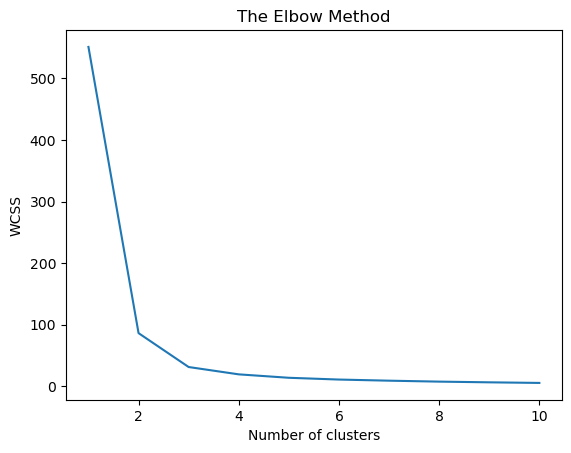

In [117]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
# Training the K-Means model on the dataset
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = model.fit_predict(X)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [119]:
iris_map = {0: 'versicolor', 1: 'setosa', 2: 'virginica'}
df_pred = pd.DataFrame(y_kmeans)
df_pred.columns = ['predict']
df_pred['predict'] = df_pred['predict'].map(iris_map)
df_pred['real'] = df['species']

In [120]:
pd.crosstab(df_pred['predict'], df_pred['real'])

real,setosa,versicolor,virginica
predict,,,
setosa,50,0,0
versicolor,0,48,4
virginica,0,2,46


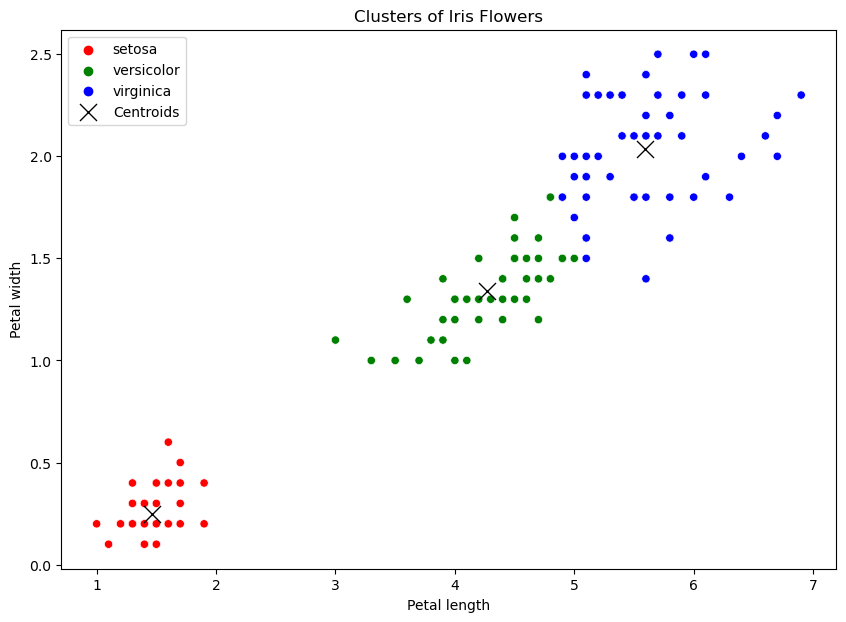

In [121]:
# Visualising the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue=df_pred['predict'], data=df, palette=['red', 'green', 'blue'])
sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], color = 'black', marker='x', s = 150, label = 'Centroids')
plt.title('Clusters of Iris Flowers')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()